#  Human Protein Atlas - Single Cell Classification

1.Top 10% teams worldwide as of midnight May 11, 2021 will get A in this class.
2.Feature engineering: create new features from the raw data
3.Supervised learning models: Choose 2 supervised learning models from W3, W4, W5
4.Advanced models: choose 1 from XGBoost W12 or Neural Network W13 or Deep learning W14 to build your supervised learning models
5.Model evaluation: For each of the supervised learning models, evaluate the model using the techniques from W10
6.If data size is too big and your model is too slow, feel free to choose small set for your project.
Your jupyter submission should be in an article quality. Do NOT print huge data set in the notebook. Use head(). Use plotting to visualize your analysis and results. Use markdown to write your comments.
If you are not in the top 10% teams worldwide, your score is based on completeness on every step.
7.Submit in HTML and ipynb format on canvas

#### importing the required libraries

In [31]:
!pip install ipyplot -q
from fastai.vision.all import *
import pandas as pd
import numpy as np
import cv2
import ipyplot
import imageio
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = Path('D:/Machine_Learning_Daming/Final_Project/Data')

In [32]:
train_df = pd.read_csv("D:/Machine_Learning_Daming/Final_Project/Data/train.csv")
train_df.tail()

ID Label
21801  dd0989c4-bbca-11e8-b2bc-ac1f6b6435d0    14
21802  dd1f7fb8-bbca-11e8-b2bc-ac1f6b6435d0   3|0
21803  dd5cb36a-bbca-11e8-b2bc-ac1f6b6435d0  14|0
21804  df573730-bbca-11e8-b2bc-ac1f6b6435d0    14
21805  dea19dc6-bbca-11e8-b2bc-ac1f6b6435d0   5|0

### checking the images
###### displaying the image in black and white

(2048, 2048, 3)


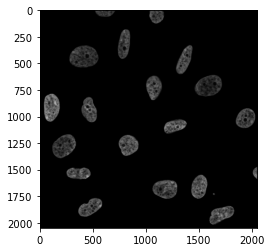

In [33]:
image = cv2.imread(r"D:\Machine_Learning_Daming\Final_Project\Data\train\000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)
plt.show()

###### combining the red,blue,yellow channels of the image into one

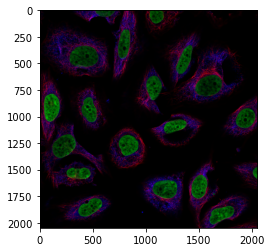

In [34]:
# stacking three images: red, blue, yellow
# '''
r = plt.imread(r"D:\Machine_Learning_Daming\Final_Project\Data\train\000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png")
b = plt.imread(r"D:\Machine_Learning_Daming\Final_Project\Data\train\000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png")
y = plt.imread(r"D:\Machine_Learning_Daming\Final_Project\Data\train\000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png")
stacked = np.dstack((r,b,y))
plt.imshow(stacked)

#### Feature Engineering
###### adding new features to the data set 

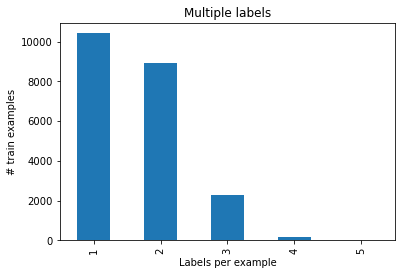

In [35]:
#getting to know the image data in detail (calculating the multi lables)
train_df['num_classes'] = train_df['Label'].apply(lambda r: len(r.split('|')))
train_df['num_classes'].value_counts().plot.bar(title='Multiple labels', xlabel='Labels per example', ylabel='# train examples')
plt.show()

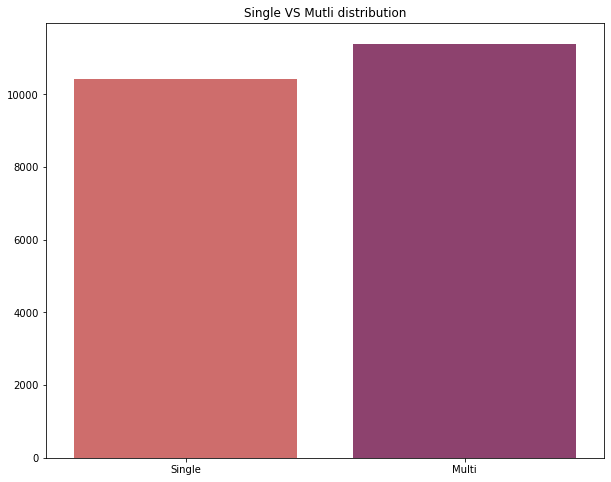

In [36]:
#now lets compare between single vs multi label distribution
single_class = train_df[train_df['num_classes'] == 1]['num_classes'].count()
multi_class = train_df[train_df['num_classes'] > 1]['num_classes'].count()

plt.figure(figsize=(10, 8))
plt.title("Single VS Mutli distribution")
sns.barplot(x=['Single', 'Multi'], y=[single_class, multi_class],palette='flare')
plt.show()

C:\Users\dlpau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


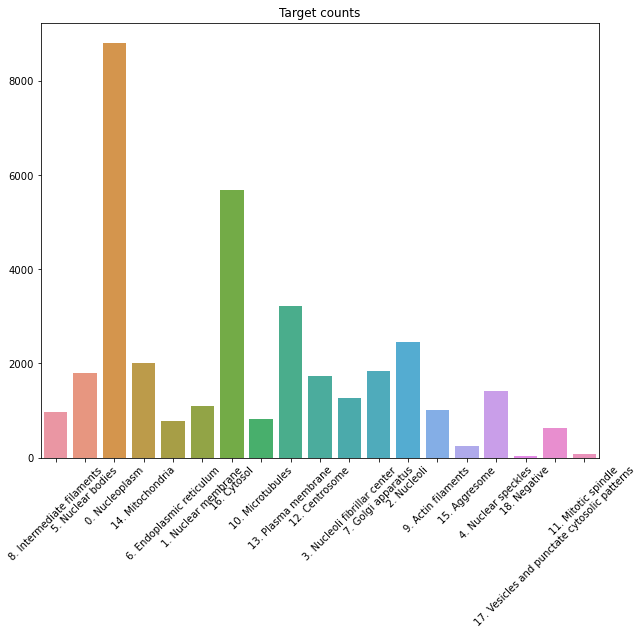

In [37]:
#now lets compare between single vs multi label distribution
labels = train_df["Label"].apply(lambda x: x.split("|"))
labels_count = defaultdict(int)
codes = [
'0. Nucleoplasm',
'1. Nuclear membrane',
'2. Nucleoli',
'3. Nucleoli fibrillar center',
'4. Nuclear speckles',
'5. Nuclear bodies',
'6. Endoplasmic reticulum',
'7. Golgi apparatus',
'8. Intermediate filaments',
'9. Actin filaments',
'10. Microtubules',
'11. Mitotic spindle',
'12. Centrosome',
'13. Plasma membrane',
'14. Mitochondria',
'15. Aggresome',
'16. Cytosol',
'17. Vesicles and punctate cytosolic patterns',
'18. Negative'
]
# Update the counter 
for label in labels:
    if len(label) > 1:
        for l in label:
            labels_count[codes[int(l)]]+=1
    else:
        labels_count[codes[int(label[0])]]+=1
        
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
plt.title("Target counts")
sns.barplot(list(labels_count.keys()),list(labels_count.values()))
plt.show()

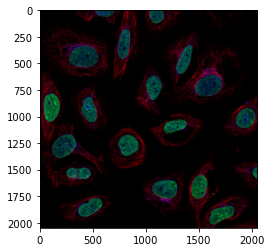

In [38]:
'''
stacking three images: red, blue, green
'''
r = plt.imread(r"D:\Machine_Learning_Daming\Final_Project\Data\train\000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png")
b = plt.imread(r"D:\Machine_Learning_Daming\Final_Project\Data\train\000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png")
g = plt.imread(r"D:\Machine_Learning_Daming\Final_Project\Data\train\000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png")
stacked = np.dstack((r,b,g))
plt.imshow(stacked)

###### checking all the 18 lables


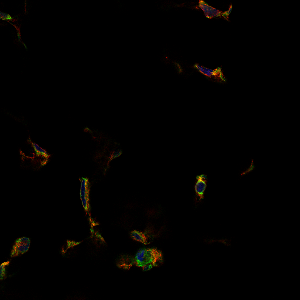
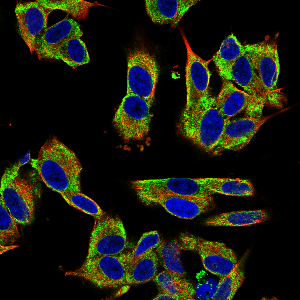
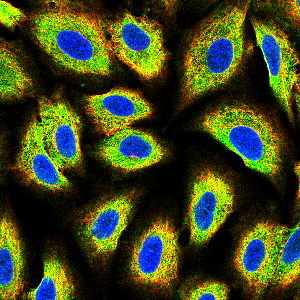
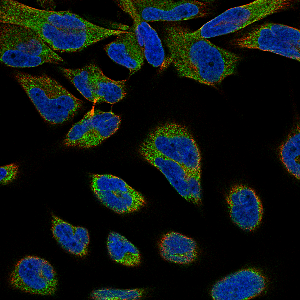
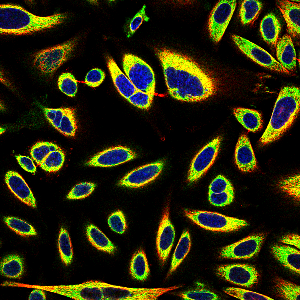
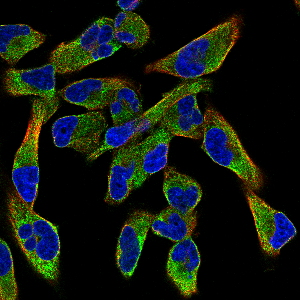
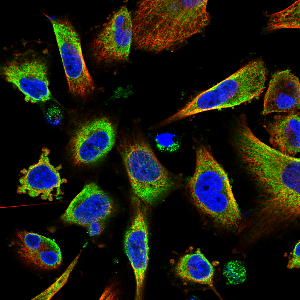
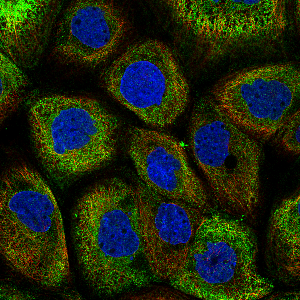
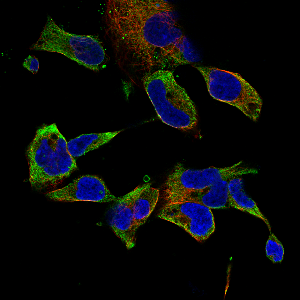
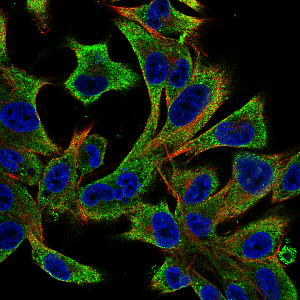
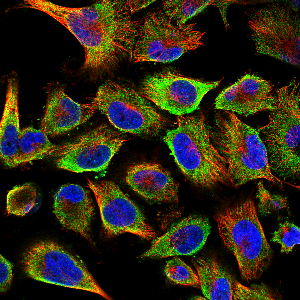
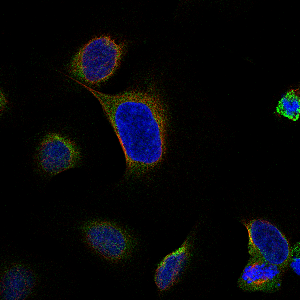
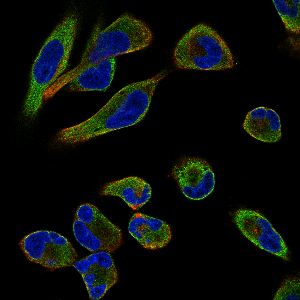
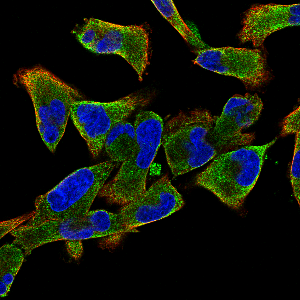
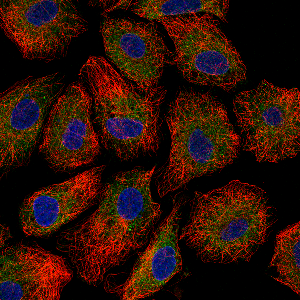
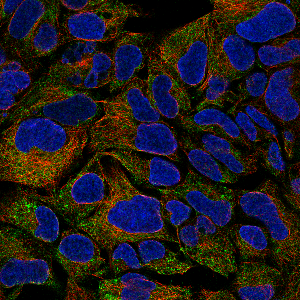
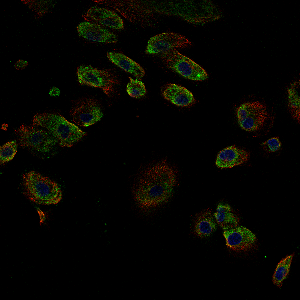
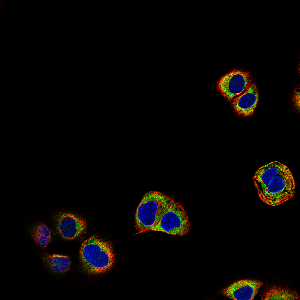
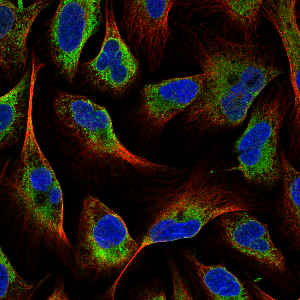


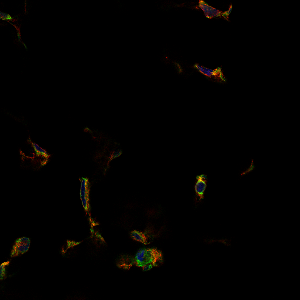
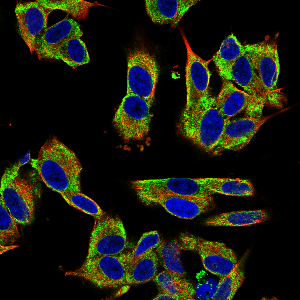
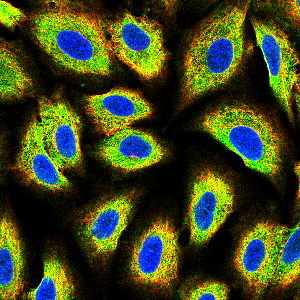
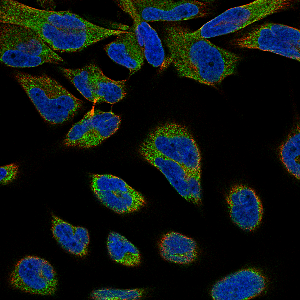
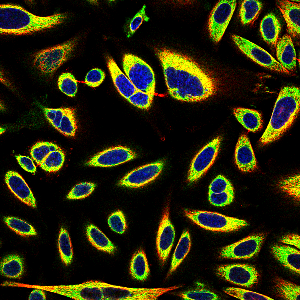
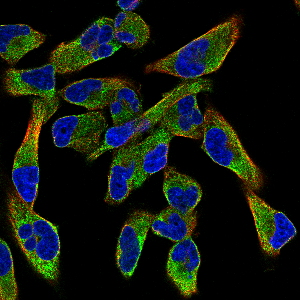
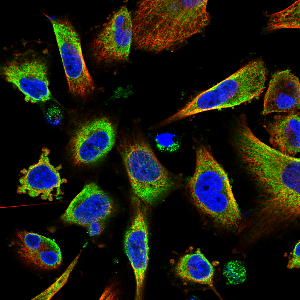
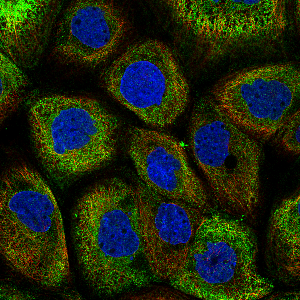
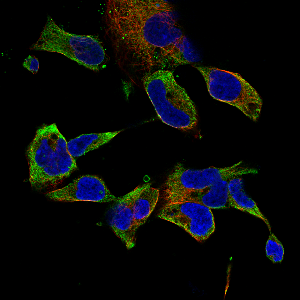
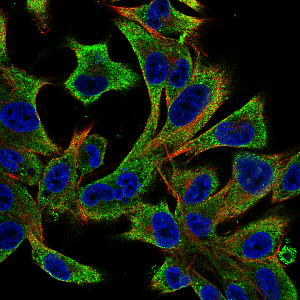
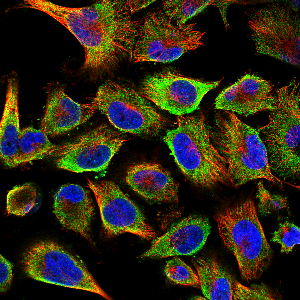
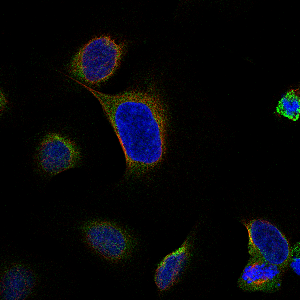
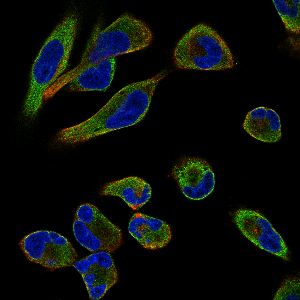
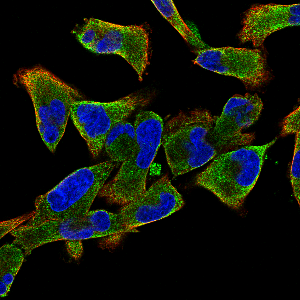
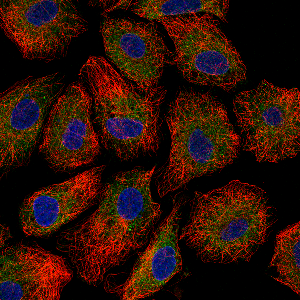
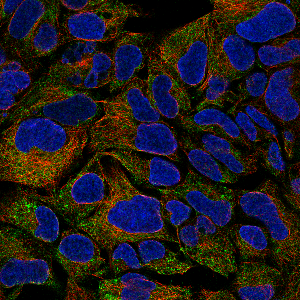
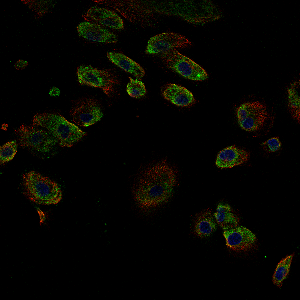
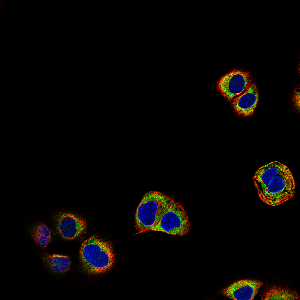
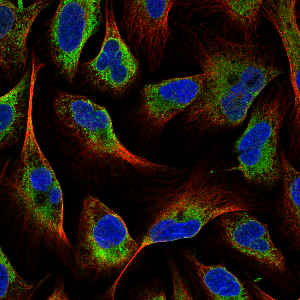

In [39]:
labels = [str(i) for i in range(19)]
class_img = []
for l in labels:
    r_img = train_df[train_df.Label == l].reset_index(drop=True).ID.loc[0] + '_red.png'
    y_img = train_df[train_df.Label == l].reset_index(drop=True).ID.loc[0] + '_yellow.png'
    b_img = train_df[train_df.Label == l].reset_index(drop=True).ID.loc[0] + '_blue.png'
    r = imageio.imread(path/'train'/r_img)
    y = imageio.imread(path/'train'/y_img)
    b = imageio.imread(path/'train'/b_img)
    ryb = np.dstack((r,y,b))
    class_img.append(PILImage.create(ryb))

codes = [
'0. Nucleoplasm',
'1. Nuclear membrane',
'2. Nucleoli',
'3. Nucleoli fibrillar center',
'4. Nuclear speckles',
'5. Nuclear bodies',
'6. Endoplasmic reticulum',
'7. Golgi apparatus',
'8. Intermediate filaments',
'9. Actin filaments',
'10. Microtubules',
'11. Mitotic spindle',
'12. Centrosome',
'13. Plasma membrane',
'14. Mitochondria',
'15. Aggresome',
'16. Cytosol',
'17. Vesicles and punctate cytosolic patterns',
'18. Negative'
]

ipyplot.plot_images(images=class_img, labels=codes, max_images=32, img_width=300)

In [59]:
singleclassimages = train_df[train_df['num_classes'] == 1]
count=singleclassimages['ID'].count()
one_to_hundred = pd.Series(range(1,10413))
singleclassimages.set_index([one_to_hundred],inplace=True)
train_df1 = singleclassimages[10300:]
train_df1.reset_index(drop=True,inplace=True)

##### Feature extraction from images  

In [60]:
# from PIL import Image

In [61]:
# my_columns = range(1,41617)
# feature_array = np.empty()
# # feature_array.shape
# # data_to_append = pd.DataFrame(columns = my_columns)
# # type(data_to_append)

In [62]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.utils import to_categorical
# from keras.preprocessing import image
# from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
from tqdm import tqdm

In [67]:
train_image = []
for i in tqdm(range(1,101)):
    r_img = train_df1.ID.loc[i] + '_red.png'

    b_img = train_df1.ID.loc[i] + '_blue.png'
    g_img = train_df1.ID.loc[i] + '_green.png'
    r = imageio.imread(path/'train'/r_img)

    b = imageio.imread(path/'train'/b_img)
    g = imageio.imread(path/'train'/g_img)
    train_image=cv2.add(r,b,g)
#     rbg = np.dstack((r,b,g))
#     train_image=PILImage.create(rbg)
#     train_image.shape[0]    
#     img = image.load_img('train_image', target_size=(208,208,3), grayscale=0)
#     img = image.img_to_array(img)
#     img = img/255
#     train_image.append(img)
# X = np.array(train_image)
# X.shape
    scale_percent = 10 # percent of original size
    width = int(train_image.shape[0] * scale_percent / 100)
    height = int(train_image.shape[1] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(train_image, dim, interpolation = cv2.INTER_AREA)
# # resized.ndim    
# #     print('Resized Dimensions : ',resized.shape)
# #     cv2.imshow("Resized image", resized)
    features = np.array([resized])
features
    for i in range(0,resized.shape[0]):
        for j in range(0,resized.shape[1]):
            features[i][j] = ((int(resized[i,j,0]) + int(resized[i,j,1]) + int(resized[i,j,2])+int(resized[i,j,3]))/4)
    feature = np.reshape(features, (resized.shape[0]*resized.shape[1]))
    print(feature)
    for i in range(len(feature)):
        data_to_append[feature_array.columns[i+1]] = feature[i]
    feature_array = feature_array.append(data_to_append)
    feature.shape
    type(feature_array)
    basewidth = 506
    wpercent = (basewidth/float(img1.shape[0]))
    hsize = int(float(img1.shape[1])*float(wpercent))
    img1 = img1.resize(basewidth,hsize, Image.ANTIALIAS)
    type(img1)
    arr_container = np.empty((img1.shape[0], img1.shape[1]), dtype=np.str)
    import pandas as pd
    df = pd.DataFrame(arr_container)

    for l,x in enumerate(img1):
        for m,y in enumerate(x):
            r,b,g= img1[l][m]
            hexval = '%02f%02f%02f' % (r, b, g)
            df[m][l] = hexval
print(feature)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.72it/s]


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [130]:
# storing  the image features in csv file
df.to_csv('cell_df.csv')

## Applying Supervised Models

##### 1.Support Vector Machine Algorithm

In [68]:
import pandas as pd
import numpy as np
data=pd.read_csv(r"C:\Users\dlpau\Desktop\cell_df.csv")

In [69]:
data.head()

image_id    r_mean    g_mean    b_mean  \
0  0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0  0.019785  0.007022  0.081189   
1  0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0  0.021645  0.011319  0.059531   
2  0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0  0.026710  0.014573  0.054268   
3  0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0  0.018123  0.009205  0.065854   
4  0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0  0.029577  0.014019  0.037737   

   cell_id image_labels  size1  size2  
0        1            0    510    656  
1        2            0    875    748  
2        3            0    924    760  
3        4            0    844    538  
4        5            0    620   1168

In [70]:
data.shape

(174038, 8)

In [71]:
data['num_classes'] = data['image_labels'].apply(lambda r: len(r.split('|')))
data.head()

image_id    r_mean    g_mean    b_mean  \
0  0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0  0.019785  0.007022  0.081189   
1  0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0  0.021645  0.011319  0.059531   
2  0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0  0.026710  0.014573  0.054268   
3  0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0  0.018123  0.009205  0.065854   
4  0e63afe6-bbca-11e8-b2bc-ac1f6b6435d0  0.029577  0.014019  0.037737   

   cell_id image_labels  size1  size2  num_classes  
0        1            0    510    656            1  
1        2            0    875    748            1  
2        3            0    924    760            1  
3        4            0    844    538            1  
4        5            0    620   1168            1

In [72]:
single_class = data[data['num_classes'] == 1]
single_class.shape
# multi_class = train_df[train_df['num_classes'] > 1]['num_classes'].count()

(145931, 9)

In [73]:
df=single_class.sample(n = 5000)

In [74]:
df.head()

image_id    r_mean    g_mean    b_mean  \
39294   b90cb542-bb9c-11e8-b2b9-ac1f6b6435d0  0.091250  0.104661  0.085184   
127081  6d38ea60-bba0-11e8-b2b9-ac1f6b6435d0  0.012550  0.029235  0.054905   
2898    5f37d732-bbaf-11e8-b2ba-ac1f6b6435d0  0.061348  0.126205  0.036049   
57191   9c2599ba-bba8-11e8-b2ba-ac1f6b6435d0  0.127233  0.014125  0.048422   
109395  45ca7ef4-bb9a-11e8-b2b9-ac1f6b6435d0  0.020579  0.069196  0.093122   

        cell_id image_labels  size1  size2  num_classes  
39294        23            3    388    380            1  
127081        3           13    320    440            1  
2898         10            0    272    303            1  
57191        10            5    205    223            1  
109395        7           10    462    698            1

In [75]:
X = df[["r_mean", "g_mean","b_mean","cell_id","size1","size2"]]

In [76]:
Y=df["image_labels"]

In [77]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=0.25)

In [78]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [79]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

###### evaluating the model

In [80]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0848


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.00      0.00      0.00        42
          10       0.17      0.02      0.03        55
          12       0.00      0.00      0.00        95
          13       0.50      0.02      0.05        82
          14       0.08      0.98      0.15        98
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        67
          17       0.00      0.00      0.00        39
          18       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        95
           3       0.00      0.00      0.00       104
           4       0.14      0.08      0.10        86
           5       0.00      0.00      0.00       109
           6       0.00      0.00      0.00        67
           7       0.00      0.00      0.00        93
           8       0.00      0.00      0.00        83
           9       0.00    

C:\Users\dlpau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 2.Random Forest Algorithm

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rfr = RandomForestRegressor(random_state=1, max_depth=10)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [84]:
rfr_predicty = rfr.predict(x_test)

###### evaluating the model

In [85]:
import math
import sklearn.metrics as metrics
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, rfr_predicty))))

Root Mean Square Error test = 4.979208762365325


The accuracy of the model keeps on increasing with respective number of samples taken 

# Applying Advanced Supervised Model

#### NFNET 
So google has come up with a faster bread of CNN architecture called NFNet(Normalizer free network) which can be trained in larger batch sizes and stronger data augmentations and have set new SOTA validation accuracies on ImageNet. 

In [138]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
import torchvision.transforms as tfms
torch.cuda.is_available()

False

In [136]:
#hyperparameters
CLASS = 19
BATCH_SIZE = 32
EPOCHS = 5
LR = 1e-4
RESIZE = 256
DEVICE = torch.device('cuda') if torch.cuda.is_available()\
         else torch.device('cpu')
PATH = "D:/Machine_Learning_Daming/Final_Project/Data/"
TRAIN_DIR = PATH + "train/"
TEST_DIR = PATH + "test/"

#imagenet transform
img_tfms = tfms.Compose(
    [tfms.ToTensor(),
     tfms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
DEVICE

device(type='cpu')

In [89]:
class HPADataset(Dataset):
    def __init__(self,csv_path,ids,label,resize=None,transforms=None):
        self.csv_path = csv_path
        self.ids = ids
        self.label = label
        self.resize = resize
        self.transforms = transforms
        
    def __len__(self):
        return len(self.ids)
    
    def __getitem__(self, item):
        _ids = self.ids[item]
        image = cv2.imread(os.path.join(self.csv_path,_ids +'_green.png'))
        if self.resize:
            image = cv2.resize(image, (self.resize, self.resize))
            image = image / 255.0
        
        #setting the target to one hot encoded form
        if "train" in self.csv_path:
            y = self.label[item]
            y = y.split('|')
            y = list(map(int, y))
            y = np.eye(CLASS, dtype='float')[y]
            y = y.sum(axis=0)
            return self.transforms(image), y
        elif "test" in self.csv_path:
            return self.transforms(image), _ids

In [90]:
#model
class NFNet(nn.Module):
    def __init__(self,output_features, model_name = 'nfnet_f1', pertrained=True):
        super(NFNet, self).__init__()
        self.model = timm.create_model(model_name, pretrained=pertrained)
        self.model.head.fc = nn.Sequential(nn.Linear(self.model.head.fc.in_features, 512),
                                 nn.ReLU(),
                                 nn.Linear(512, output_features))
        
    def forward(self, x):
        x = self.model(x)
        return x

class CNNet(nn.Module):
    def __init__(self, input_features, output_features):
        super(CNNet, self).__init__()
        self.model = torchvision.models.resnet34(pretrained=True)
        self.model.fc = nn.Sequential(nn.Linear(input_features, 100),
                                 nn.ReLU(),
                                 nn.Linear(100, output_features))

    def forward(self, x):
        out = self.model(x)
        return out

In [91]:
import timm
import sys; 
sys.path.insert(0,"D:/Machine_Learning_Daming/Final_Project/timm-nfnet")

In [92]:
model = NFNet(CLASS)
model = model.to(DEVICE)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

No pretrained weights exist for this model. Using random initialization.


In [118]:
train_df = pd.read_csv("D:/Machine_Learning_Daming/Final_Project/Data/train.csv")
train_df['num_classes'] = train_df['Label'].apply(lambda r: len(r.split('|')))
single_class = train_df[train_df['num_classes'] == 1]
multi_class = train_df[train_df['num_classes'] > 1]
train_df = multi_class.sample(frac=1).reset_index(drop=True)
train_df = multi_class.iloc[1200:1300,:]
# train_df.shape
X_train, y_train = train_df.loc[:,'ID'].values,\
                    train_df['Label'].values
X_ds = HPADataset(TRAIN_DIR, X_train, y_train, RESIZE, img_tfms)
train_ds, valid_ds = random_split(X_ds,[80,20])  
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE,shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=BATCH_SIZE,shuffle=True)

 20%|████████████████▌                                                                  | 1/5 [01:51<07:24, 111.12s/it]

epoch: 0 loss:0.2938721736406973


 40%|█████████████████████████████████▏                                                 | 2/5 [03:40<05:31, 110.63s/it]

epoch: 1 loss:0.27813437254486706


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [05:22<03:36, 108.05s/it]

epoch: 2 loss:0.2757114753473791


 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [07:05<01:46, 106.38s/it]

epoch: 3 loss:0.2682550190672229


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [08:48<00:00, 105.64s/it]

epoch: 4 loss:0.2631098293873437


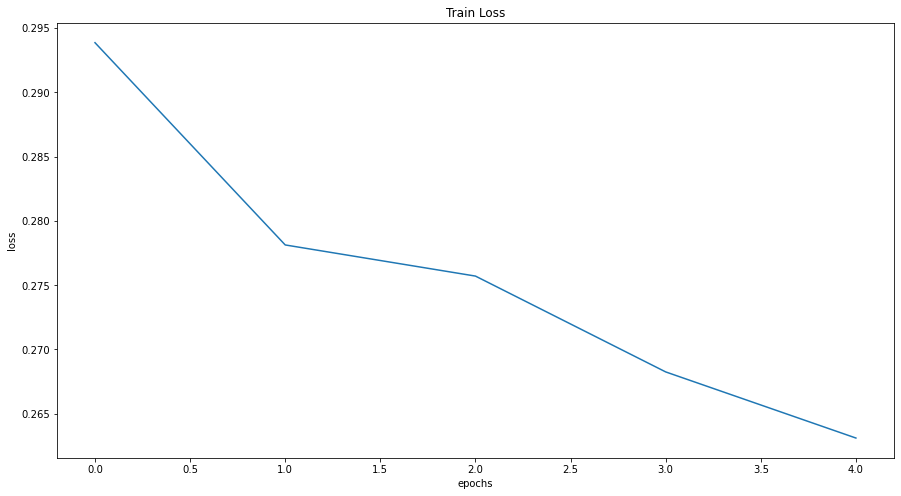

In [119]:
loss_hist = []
for epoch in tqdm(range(EPOCHS)):
    losses = []
    model = model.train()
    for batch_idx, (image, label) in enumerate(train_dl):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        output = model(image.float())
        loss = loss_fn(output, label)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_hist.append(sum(losses)/len(losses))
    print(f"epoch: {epoch} loss:{sum(losses)/len(losses)}")

plt.figure(figsize=(15, 8))
plt.title('Train Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(loss_hist)
plt.show()

###### evaluating the model

In [127]:
def check_accuracy(loader, model):
    correct = 0.
    total = 0.
    with torch.no_grad():
        model.eval()
        for images, labels in loader:
            images = images.to(DEVICE)
            outputs = model(images.float())
            outputs = torch.sigmoid(outputs).cpu() 
            predicted = np.round(outputs)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            break
    accuracy = correct / total
    print("Accuracy: {}%".format(accuracy))

In [128]:
check_accuracy(valid_dl,model)

Accuracy: 17.05%


In [121]:
X_Test = [name.rstrip('green.png').rstrip('_') for name in (os.listdir(TEST_DIR)) if '_green.png' in name]

test_ds = HPADataset(TEST_DIR, X_Test, None, RESIZE, img_tfms)
test_dl = DataLoader(test_ds, batch_size=1, shuffle=False)

submission_lst = []

with torch.no_grad():
    model.eval()
    for image, file in test_dl:     
        image = image.to(DEVICE)        
        output = model(image.float())                          
        prob = torch.softmax(output, dim=1)
        p, top_class = prob.topk(1, dim=1)
        sp = ' '.join(str(e) for e in [top_class[0][0].item(), p[0][0].item()])               
        img = cv2.imread(TEST_DIR + file[0] + '_green.png')
        
        if img.shape[0] == 2048:
            sp = sp + ' eNoLCAgIMAEABJkBdQ=='
        elif img.shape[0] == 1728:
            sp = sp + ' eNoLCAjJNgIABNkBkg=='
        else:
            sp = sp + ' eNoLCAgIsAQABJ4Beg=='
        
        submission_lst.append([file[0], img.shape[1], img.shape[0], sp])
        
sub = pd.DataFrame.from_records(submission_lst, columns=['ID', 'ImageWidth', 'ImageHeight', 'PredictionString'])
sub.head()

ID  ImageWidth  ImageHeight  \
0  0040581b-f1f2-4fbe-b043-b6bfea5404bb        2048         2048   
1  004a270d-34a2-4d60-bbe4-365fca868193        2048         2048   
2  00537262-883c-4b37-a3a1-a4931b6faea5        2048         2048   
3  00c9a1c9-2f06-476f-8b0d-6d01032874a2        2048         2048   
4  0173029a-161d-40ef-af28-2342915b22fb        3072         3072   

                             PredictionString  
0   0 0.4500245153903961 eNoLCAgIMAEABJkBdQ==  
1  0 0.44568702578544617 eNoLCAgIMAEABJkBdQ==  
2  0 0.44860872626304626 eNoLCAgIMAEABJkBdQ==  
3  0 0.44775670766830444 eNoLCAgIMAEABJkBdQ==  
4  0 0.43947848677635193 eNoLCAgIsAQABJ4Beg==

In [129]:
sub.to_csv("submission.csv", index=False)

###### Conclusion:
We tried traing the model with full data but due to the constraints we choose small portion of data randmoly to train the model ,based on the results from svm,random forest models the NFNets(or CNN or some other neural networks)will be the best fit for this kind of problems .